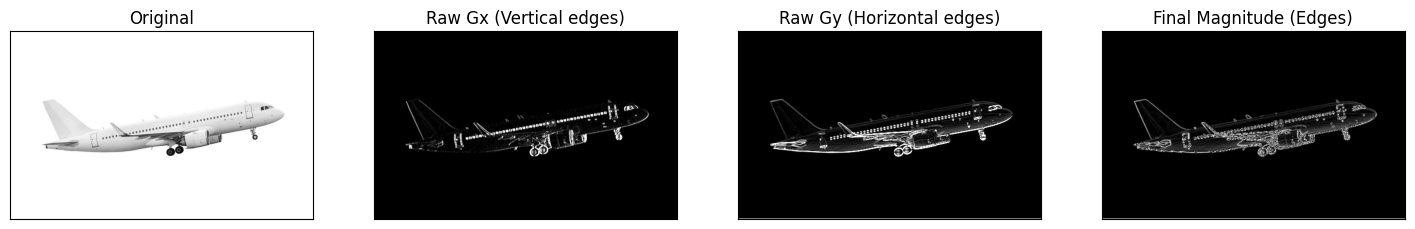


========= CENTER 5×5 VALUES =========

--- Raw Gx ---
[[   0.    3.    3.   -2.   -2.]
 [   0.    8.    9.   -5.    0.]
 [   0.   11.   13.   -1.    3.]
 [   0.   12.    7.  -24.   -4.]
 [   0.    1. -110. -197.   14.]]

--- Raw Gy ---
[[   0.    3.    9.   10.    6.]
 [   0.    2.    7.    9.   12.]
 [   0.    1.    3.    9.   13.]
 [   0.    0.   -7.  -42.  -76.]
 [   2.   -9. -130. -385. -506.]]

--- ReLU Gx ---
[[ 0.  3.  3.  0.  0.]
 [ 0.  8.  9.  0.  0.]
 [ 0. 11. 13.  0.  3.]
 [ 0. 12.  7.  0.  0.]
 [ 0.  1.  0.  0. 14.]]

--- ReLU Gy ---
[[ 0.  3.  9. 10.  6.]
 [ 0.  2.  7.  9. 12.]
 [ 0.  1.  3.  9. 13.]
 [ 0.  0.  0.  0.  0.]
 [ 2.  0.  0.  0.  0.]]


In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# ============================
# SIMPLE CNN CONV LAYER (with ReLU)
# ============================
def cnn_conv_layer(image, filters, stride=1, padding=1):
    H, W = image.shape
    num_filters = len(filters)

    # Padding
    padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Output feature map
    output = np.zeros((H, W, num_filters), dtype=np.float32)

    # Convolution + ReLU
    for i in range(H):
        for j in range(W):
            patch = padded[i:i+3, j:j+3]

            for f in range(num_filters):
                raw = np.sum(patch * filters[f])
                output[i, j, f] = max(0, raw)   # ReLU applied here

    return output


# ============================
# MAIN DEMO FUNCTION
# ============================
def run_cnn_demonstration(image_path):

    img = cv2.imread(image_path)
    if img is None:
        print("Error: Could not load image.")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)

    # Sobel Filters
    sobel_Gx = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]], dtype=np.float32)

    sobel_Gy = np.array([[-1, -2, -1],
                         [ 0,  0,  0],
                         [ 1,  2,  1]], dtype=np.float32)

    filters = [sobel_Gx, sobel_Gy]

    # ===== RUN CNN LAYER (ReLU INSIDE) =====
    activated_maps = cnn_conv_layer(gray, filters)

    Gx_relu = activated_maps[:, :, 0]
    Gy_relu = activated_maps[:, :, 1]

    # ===== RAW OUTPUT (NO RELU) =====
    H, W = gray.shape
    padded = np.pad(gray, ((1, 1), (1, 1)), mode='constant')

    Gx_raw = np.zeros((H, W), dtype=np.float32)
    Gy_raw = np.zeros((H, W), dtype=np.float32)

    for i in range(H):
        for j in range(W):
            patch = padded[i:i+3, j:j+3]
            Gx_raw[i, j] = np.sum(patch * sobel_Gx)
            Gy_raw[i, j] = np.sum(patch * sobel_Gy)

    magnitude = np.sqrt(Gx_raw**2 + Gy_raw**2)

    # ============================
    # VISUALIZATION
    # ============================
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original")
    plt.xticks([]); plt.yticks([])

    plt.subplot(1, 4, 2)
    plt.imshow(cv2.convertScaleAbs(Gx_raw), cmap='gray')
    plt.title("Raw Gx (Vertical edges)")
    plt.xticks([]); plt.yticks([])

    plt.subplot(1, 4, 3)
    plt.imshow(cv2.convertScaleAbs(Gy_raw), cmap='gray')
    plt.title("Raw Gy (Horizontal edges)")
    plt.xticks([]); plt.yticks([])

    plt.subplot(1, 4, 4)
    plt.imshow(magnitude.astype(np.uint8), cmap='gray')
    plt.title("Final Magnitude (Edges)")
    plt.xticks([]); plt.yticks([])

    plt.show()

    print("\n========= CENTER 5×5 VALUES =========")
    cx, cy = H//2, W//2

    print("\n--- Raw Gx ---")
    print(Gx_raw[cx-2:cx+3, cy-2:cy+3])

    print("\n--- Raw Gy ---")
    print(Gy_raw[cx-2:cx+3, cy-2:cy+3])

    print("\n--- ReLU Gx ---")
    print(Gx_relu[cx-2:cx+3, cy-2:cy+3])

    print("\n--- ReLU Gy ---")
    print(Gy_relu[cx-2:cx+3, cy-2:cy+3])


# ============================
# CALL THE FUNCTION
# ============================
run_cnn_demonstration("/content/aeroplane.webp")
